# Linear Regression Lecture

This lecture notebook works through using `statsmodels` for linear regression, graphing residuals, and reading the summary of the model. Bonus: how reading the summary may (or may not) be accurate!

Add comments and do the exercises in this notebook for full credit.

## Using Linear Regression

### Reading the Data

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random

random.seed(122)

data = pd.read_csv("lf.csv")
data = data.dropna()
data = data[data['income_composition_of_resources'] != 0]
data = data[(data['life_expectancy'] >= 60) & (data['life_expectancy'] <= 80)]

data.head()

,Country,Year,Status,life_expectancy,adult_mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness _1_19_years,thinness_5_9_years,income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2


### Using `statsmodels` for Linear Regression

We make a linear regression model by calling `statsmodels.OLS()`.

The parameters are a formula and a data set. We pass `life_expectancy ~ income_composition_of_resources` as our formula argument, and `data` as our data argument. Formula will always take the form `y ~ x1 + ... + xn`, where `y` is our response variable and `x1...xn` are our predictor variables!

In [95]:
X = data['income_composition_of_resources']
y = data['life_expectancy']
X = sm.add_constant(X)  # Adds a constant term to the predictor

model = sm.OLS(y, X).fit()

### Activity 1

Explore the data and create two new models: one with `Measles` and one with a variable of your choosing (do NOT choose `Year` or any column that is not continuous data). We will run these models later.

In [69]:
# Your code here to explore and create new models

### Getting Fitted Values and Residuals

To get our fitted values, or the values along our line, we call `predict()`.

In [70]:
y_predicted = model.predict(X)
y_predicted.head()

0     64.915760
16    74.424067
17    74.390469
18    74.323272
19    74.088084
dtype: float64

To find our residuals, we take our observed `y` (data['life_expectancy']) and subtract our fitted/predicted values. We can store everything back into a data frame to make graphing easier, and we can `sum()` our residuals to check that they total to 0.

In [71]:
residuals_red = data['life_expectancy'] - y_predicted
residual_data_red = pd.DataFrame({
    'x_points': data['income_composition_of_resources'],
    'y_predicted': y_predicted,
    'residual': residuals_red
})

total_residuals_red = sum(residual_data_red['residual'])
round(total_residuals_red, 5) == 0

True

When we graph our model, it is easier to use `seaborn.lmplot`, although you can easily graph the fitted points as a line using whatever method you choose.

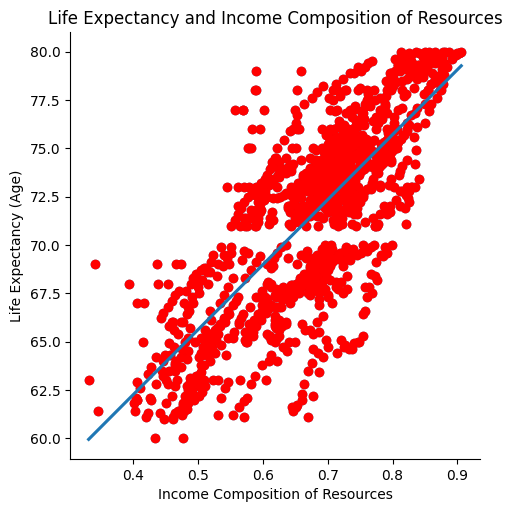

In [91]:
sns.lmplot(x='income_composition_of_resources', y='life_expectancy', data=data, ci=None)
plt.scatter(data['income_composition_of_resources'], data['life_expectancy'], color='red')
#plt.plot(data['income_composition_of_resources'], y_predicted, color='blue')
plt.title('Life Expectancy and Income Composition of Resources')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy (Age)')
plt.show()

### Activity 2

Plot the fitted values on the graph of data instead of using `sns.lmplot`. You do not have to use `seaborn`.

In [73]:
# Your code here to plot fitted values manually

### What does our model tell us?

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1670.
Date:                Mon, 20 May 2024   Prob (F-statistic):          2.37e-229
Time:                        21:51:06   Log-Likelihood:                -3065.9
No. Observations:                1200   AIC:                             6136.
Df Residuals:                    1198   BIC:                             6146.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              48.8222      0.563     86.668      0.000      47.717      49.927
income_composition_of_resources    33.5983      0.822     40.867      0.000      31.985      35.211
==============================================================================
Omnibus:                       29.356   Durbin-Watson:                   0.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.113
Skew:                          -0.348   Prob(JB):                     1.06e-07
Kurtosis:                       3.399   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
standard_error_residuals = model.scale**.5
standard_error_residuals

3.1168182129216153

Our B0 is our (Intercept) estimate of ~49 and our B1 (slope) is the estimate next to "income_composition_of_resources": ~34. We can grab these variables by doing this:

In [93]:
coef = model.params
coef[0], coef[1]

(48.8221935131935, 33.59825914237891)

The p-value on the far right of "income_composition_of_resources" shows that this variable is statistically significant, using a p-value of 0.05. `2e-16` is much smaller than 0.05, so the predictor variable we have chosen and its relationship with our response variable is very likely to not be caused by chance. We can also use the significance codes to see this. The marking denotes the level the p-value falls between. For example, if we want to claim anything less than 0.05 as significant, we would count anything marked with a '*', '**', and '***' as significant.

The residual standard error shows how well the model fits the data set by measuring the standard deviation of the residuals. The smaller this value, the better. This is more useful if we are comparing two models together, or if we use it along with our original graph. Looking at our graph from before, we can see there is some variance, especially around the middle of our line. Graphing with other variables available in the data set will give us something to compare to.

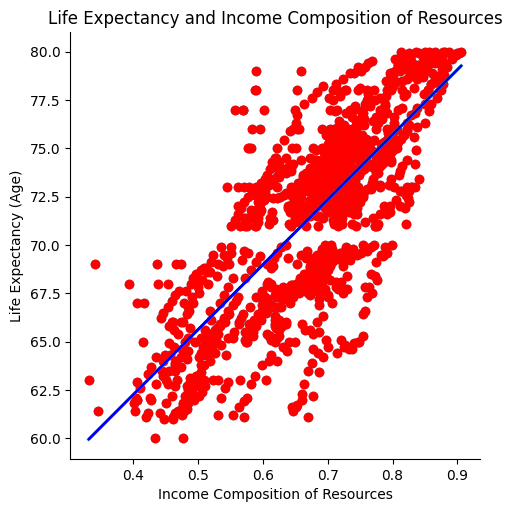

In [89]:
sns.lmplot(x='income_composition_of_resources', y='life_expectancy', data=data, ci=None)
plt.scatter(data['income_composition_of_resources'], data['life_expectancy'], color='red')
plt.title('Life Expectancy and Income Composition of Resources')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy (Age)')
plt.show()

The next item we see is an R-squared and Adjusted R-squared number. R-squared is the squared sample correlation between the predicted values and the observed values. In our case, we can say that Income Composition of Resources explains 58% of the variation in life expectancy. R-squared is biased upward - it can never lower, even with the addition of predictor variables that may not be useful for the model. Adjusted R-squared is meant to increase and decrease.

Finally, we are left with the F-statistic. This statistic determines whether your model is statistically significant compared to a model with no predictor variables. If the p-value for this test is below the significance level you've chosen, then your model typically fits the data better than a model with no predictor variables.

### Activity 3

Run `summary()` with the new model you made in Activity 1.

In [77]:
# Your code here to summarize the new model

Run `summary()` with the Measles model you made in Activity 1.

In [78]:
# Your code here to summarize the Measles model

### Activity 4

Plot the `lm()` of the new model you made in Activity 1.

In [79]:
# Your code here to plot the new model

Plot the `lm()` of the Measles model you made in Activity 1.

In [80]:
# Your code here to plot the Measles model

### Activity 5

Compare the standard error, the R², F-statistic, etc. Which model fits the data better? Which model fits the data the worst? Why? (Hint: Think of our original assumption of linearity.)

Are the statistics, the graph, or a combination of both more helpful when choosing a model that best fits the data?

In [81]:
# Your analysis here

## Bridging Lectures: Meaningful Outcomes

### How do we know if our statistics are meaningful?

It's difficult.... and context dependent.

Over-fitting can cause our model to give us coefficients that represent noise, rather than the actual relationships we hope to model. Natural variations depending on data and noise may warrant higher p-values being sufficient, or lower R-values being acceptable. Additionally, many of the statistics reported by `statsmodels` assume the 4 assumptions (LINE) are met. We'll tackle that assumption and its diagnostics next week. They are crucial to determining if our model fits the data well. For now, let's break down some common reasons we might have misleading values when thinking about context and our data.

### R²

If a model is over-fit, the R² of the model may be higher than it should be (since it can never lower). The Adjusted R² is meant to reduce this issue by adjusting for the number of predictors. It can be used to compare the fit of regression models with different numbers of predictors. If there is a large difference between R² and the Adjusted R², you can confidently say that your model is over-fitting. This is more helpful when we do multiple linear regression and have multiple predictors, which is why our R² and Adjusted R² values are similar from above.

Sometimes, a low R² is still a good thing! Some fields have an inherently large amount of unexplainable variation in their data. For example, attempting to explain behavior is difficult and noisy - these studies are expected to have lower R² scores. Another example: in medicine, a new drug might be highly variable (lots of different side effects) in different patients, but the benefits are statistically significant across the entire study (low p-values). We would have a low R² value, but the results are still important!

Think about how much variation you are trying to explain or how much makes sense before you begin the model. Pay attention to the difference between R² and Adjusted R², but don't throw out a model just because one is low or over-fitting is obvious!

### Activity 6

Is over-fitting a concern when performing simple linear regression? Why, or why not?

In [82]:
# Your answer here

### Standard Error

Sometimes, the standard error is more useful than R². If we had two data-sets of the exact same data, but one data-set had the values cut in half, the R² of both regressions would be the same. The standard error of the data-set with the half values would be exactly half of the standard error of the other data-set, though. This helps us determine how precise our model would be if we use it to predict: clearly, the model with a lower standard error would be more precise. For a concrete example of this, read through the article below.

### P-values (T-test)

The p-values next to our predictor variables only tell us that there is a statistically significant relationship between the predictor variable and our response variable, but it does not tell us if that relationship is a causal relationship or not. It only tells us that there is a correlation.

### F-statistic

The F-statistic also uses a p-value, and it is more useful in multiple linear regression cases. We'll explore this statistic more next week. For this week, the F-statistic p-value is saying that our model performs statistically significantly better than a model that only used the intercept coefficient. It's still a p-value, so it isn't claiming any sort of causation, but it's typically good to see significance here!

### Activity 7

Change the predictor variable to `Year` and re-run the notebook. Is this an appropriate predictor variable? What do you notice about the p-values for the coefficients and the F-statistic? What about R²?

In [83]:
# Your code here to use Year as predictor variable

### Activity 8

Should we judge model behavior solely based off of its output statistics alone?

(Hint: re-read the bold line at the beginning of this section, and think about your answer to Activity 5.)

In [84]:
# Your answer here

Overall, we do not have enough information to say our results are meaningful (yet!) We will explore different datasets and the assumptions we make with linear regression, especially the different ways they may affect our `summary()` outcomes.

## Next Lecture

- Cover our other three assumptions and why normal residuals are important (confidence intervals for coefficients, hypothesis tests for coefficients, F-tests, and the prediction intervals).
- Cover Diagnostics (How to Check Our Assumptions)
- Multiple Linear Regression
- How to Use Categorical Predictor Variables